In [454]:
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle
import __future__
import csv
import ast



In [430]:
data=pd.read_csv('/Users/aridamansc/Desktop/exoplanet/kepler_TCE.csv')
data=data[data['av_training_set']!='UNK']
data

,loc_rowid,kepid,tce_plnt_num,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1,1162345,2,0.831850,6.693070e-05,132.227,0.035197,0.92600,1.471000,2.392,...,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
3,4,1162345,3,0.831833,9.431020e-06,131.919,0.002209,0.09536,51.770000,2.181,...,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
5,6,757450,1,8.884920,1.186150e-06,134.452,0.000101,0.05677,0.950200,2.078,...,27.6,NaN,NaN,5332.0,102.0,4.50,0.04,0.843,0.051,PC
6,7,892667,1,2.262110,2.726600e-05,132.171,0.006531,0.30000,10.610000,7.509,...,486.0,NaN,NaN,6609.0,236.0,4.11,0.28,1.654,0.811,NTP
7,8,892772,1,5.092600,3.144550e-05,133.451,0.004821,0.30000,16.090000,3.399,...,78.6,NaN,NaN,5037.0,197.0,4.55,0.12,0.751,0.127,AFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20361,20362,11905761,2,3.580330,6.525820e-05,133.312,0.012868,0.08263,68.700000,13.260,...,406.0,NaN,NaN,6745.0,308.0,3.93,0.24,2.346,0.954,AFP
20363,20364,11908559,1,0.716006,1.242640e-05,132.019,0.002549,0.70000,0.626200,2.069,...,774.0,NaN,NaN,7224.0,309.0,3.89,0.24,2.508,1.039,AFP
20364,20365,11923562,2,0.739472,1.068170e-05,131.618,0.001399,0.28480,6.828000,2.146,...,997.0,NaN,NaN,7191.0,318.0,4.23,0.38,1.473,1.005,AFP
20365,20366,11923819,1,33.159500,9.532960e-07,159.812,0.000023,0.74720,0.019810,9.132,...,200.0,NaN,NaN,7968.0,323.0,3.95,0.23,2.390,0.854,AFP


In [385]:
data['av_training_set'] = data['av_training_set'].apply(lambda x: 1 if x == 'PC' else 0)


In [386]:
data = data[~data['kepid'].duplicated()] #removing duplicate kepids
data

,loc_rowid,kepid,tce_plnt_num,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1,1162345,2,0.83185,6.693070e-05,132.227,0.035197,0.92600,1.47100,2.392,...,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,0
5,6,757450,1,8.88492,1.186150e-06,134.452,0.000101,0.05677,0.95020,2.078,...,27.6,NaN,NaN,5332.0,102.0,4.50,0.04,0.843,0.051,1
6,7,892667,1,2.26211,2.726600e-05,132.171,0.006531,0.30000,10.61000,7.509,...,486.0,NaN,NaN,6609.0,236.0,4.11,0.28,1.654,0.811,0
7,8,892772,1,5.09260,3.144550e-05,133.451,0.004821,0.30000,16.09000,3.399,...,78.6,NaN,NaN,5037.0,197.0,4.55,0.12,0.751,0.127,0
13,14,1026957,1,21.76130,1.002540e-05,144.779,0.000385,0.31800,1.36000,1.277,...,20.7,NaN,NaN,4859.0,105.0,4.61,0.06,0.723,0.053,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20350,20351,11766996,1,2.57015,3.561260e-05,132.004,0.008524,0.94720,0.03921,6.296,...,598.0,NaN,NaN,6982.0,233.0,4.19,0.35,1.582,0.984,0
20358,20359,11852982,1,13.81500,1.980510e-05,139.681,0.001159,0.92650,0.01786,2.526,...,18.2,NaN,NaN,3833.0,96.0,4.72,0.04,0.545,0.040,1
20359,20360,11853130,1,76.87940,4.380300e-05,146.882,0.000515,0.86230,0.02334,2.357,...,15.4,NaN,NaN,3587.0,62.0,4.89,0.08,0.380,0.060,1
20360,20361,11905761,1,3.58024,6.820920e-05,135.071,0.014266,0.09369,69.84000,11.990,...,406.0,NaN,NaN,6745.0,308.0,3.93,0.24,2.346,0.954,0


In [387]:
kepid,labels=[],[]
kepid=list(data['kepid'])
labels=list(data['av_training_set'])
for i in range(len(kepid)):
    kepid[i]=str('KIC '+str(kepid[i]))
kepid

['KIC 1162345',
 'KIC 757450',
 'KIC 892667',
 'KIC 892772',
 'KIC 1026957',
 'KIC 1160891',
 'KIC 1162150',
 'KIC 1161345',
 'KIC 1292087',
 'KIC 1573174',
 'KIC 1574792',
 'KIC 1575690',
 'KIC 1575873',
 'KIC 1865567',
 'KIC 2019227',
 'KIC 2019477',
 'KIC 2167600',
 'KIC 2306740',
 'KIC 2307199',
 'KIC 2439211',
 'KIC 2439243',
 'KIC 2554853',
 'KIC 2554867',
 'KIC 2578072',
 'KIC 2578077',
 'KIC 2693092',
 'KIC 2693097',
 'KIC 2714932',
 'KIC 2714947',
 'KIC 2714954',
 'KIC 2722074',
 'KIC 2854698',
 'KIC 2854914',
 'KIC 2987660',
 'KIC 2988145',
 'KIC 2992648',
 'KIC 2855603',
 'KIC 2856756',
 'KIC 2857323',
 'KIC 2857607',
 'KIC 2857722',
 'KIC 2860114',
 'KIC 2860594',
 'KIC 2860851',
 'KIC 2439798',
 'KIC 2969628',
 'KIC 2969638',
 'KIC 2970804',
 'KIC 2971415',
 'KIC 2693450',
 'KIC 2974858',
 'KIC 2975770',
 'KIC 2714955',
 'KIC 2985398',
 'KIC 2985587',
 'KIC 2985767',
 'KIC 2988768',
 'KIC 2989404',
 'KIC 1294670',
 'KIC 1576115',
 'KIC 1867630',
 'KIC 2167890',
 'KIC 23072

In [427]:
csv_file = "final_exop_data.csv"

# Write data to the CSV file
with open(csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    
    for id in kepid[9360:]:
        try:
            lc = lk.search_lightcurve(id, mission='Kepler', quarter=16).download()
            time = list(lc.time.value)
            flux = list(lc.flux.value.tolist())
            writer.writerow([id, time, flux])
            print(id)
        except Exception as e:
            print(f"{id} had an error:", str(e))
            continue
        
csv_file.close()      

/Users/aridamansc/opt/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:423: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


KeyboardInterrupt: 

In [426]:
kepid.index('KIC 12834874')

9357

In [594]:
data2=pd.read_csv("final_exop_data.csv")
len(data2)

8886

In [595]:
data2= data2.drop_duplicates()

len(data2)

8886

In [596]:
data2['labels']=None

In [597]:
for id in data2['kepid']:
    # Check if the 'id' exists in data['kepid']
    if id in data['kepid']:
        # Find the corresponding label in data and assign it to data2
        label = data[data['kepid'] == id]['labels'].values[0]
        data2.loc[data2['kepid'] == id, 'labels'] = label

In [598]:
data2['labels']

0       None
1       None
2       None
3       None
4       None
        ... 
8881    None
8882    None
8883    None
8884    None
8885    None
Name: labels, Length: 8886, dtype: object

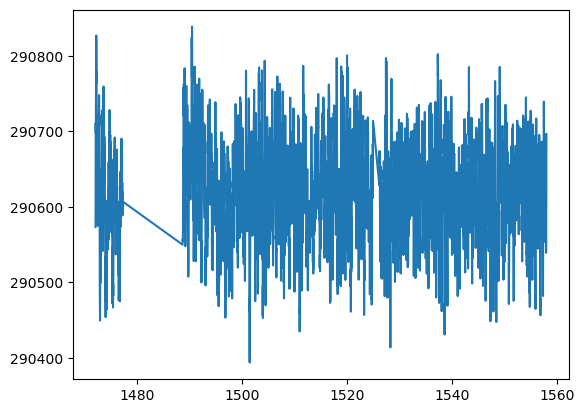

In [599]:
x=data2['flux'][0][1:-1].split(',')
# Convert the list of strings to a list of integers
x= [float(item) for item in x]
plt.plot(ast.literal_eval(data2['time'][0]),x)
plt.show()

In [600]:
x=data2['flux'][0][1:-1].split(',')
# Convert the list of strings to a list of integers
x= [float(item) for item in x]
x

[290573.1875,
 290615.40625,
 290711.09375,
 290697.0625,
 290749.46875,
 290780.5,
 290763.4375,
 290826.96875,
 290803.375,
 290771.09375,
 290747.5625,
 290729.78125,
 290671.1875,
 290630.65625,
 290669.4375,
 290611.84375,
 290644.21875,
 290722.84375,
 290649.59375,
 290674.1875,
 290627.40625,
 290574.8125,
 290674.125,
 290650.5,
 290705.6875,
 290686.65625,
 290649.0,
 290674.15625,
 290691.6875,
 290632.3125,
 290662.625,
 290685.03125,
 290708.8125,
 290748.125,
 290707.65625,
 290721.8125,
 290715.75,
 290626.65625,
 290645.875,
 290558.15625,
 290486.59375,
 290449.40625,
 290483.96875,
 290515.71875,
 290499.03125,
 290543.65625,
 290512.9375,
 290509.59375,
 290628.96875,
 290650.0625,
 290645.09375,
 290628.09375,
 290611.75,
 290625.59375,
 290618.9375,
 290613.90625,
 290595.09375,
 290657.90625,
 290687.8125,
 290727.90625,
 290678.90625,
 290653.53125,
 290645.5,
 290621.03125,
 290598.5,
 290541.40625,
 290591.5,
 290596.28125,
 290606.46875,
 290663.0625,
 290602.

In [601]:
ast.literal_eval(data2['time'][0])

[1472.1167966736903,
 1472.1372297143098,
 1472.1576625552843,
 1472.1780955964932,
 1472.1985285380433,
 1472.2189613799492,
 1472.2393944220894,
 1472.2598273645708,
 1472.2802602075244,
 1472.300693250596,
 1472.321126194125,
 1472.3415591380108,
 1472.3619920821293,
 1472.3824250265898,
 1472.4028580714075,
 1472.4232909164566,
 1472.4437238619648,
 1472.464156907714,
 1472.4845898538042,
 1472.5050227002503,
 1472.5254557469307,
 1472.545888694076,
 1472.5663216414468,
 1472.5867545891742,
 1472.6071875372436,
 1472.627620485553,
 1472.6480534342118,
 1472.6684863833361,
 1472.6889193325696,
 1472.709352282276,
 1472.729785132331,
 1472.750218182613,
 1472.7706511332508,
 1472.7910841842313,
 1472.8115170355668,
 1472.8319499871359,
 1472.8523830391641,
 1472.872815891431,
 1472.8932488440478,
 1472.913681896891,
 1472.9341147502055,
 1472.974980757761,
 1472.9954137118912,
 1473.015846666487,
 1473.036279621425,
 1473.0567125766029,
 1473.07714553213,
 1473.0975784879993,
 1473.1

In [602]:
data2.flux

0       [290573.1875, 290615.40625, 290711.09375, 2906...
1       [11482.1005859375, 11476.09765625, 11474.22949...
2       [76636.7421875, 76644.0390625, 76627.0859375, ...
3       [12183.046875, 12195.359375, 12198.2783203125,...
4       [119163.3046875, 119160.125, 119167.234375, 11...
                              ...                        
8881    [564531.3125, 564531.5, 564517.875, 564634.562...
8882    [8410.2421875, 8407.896484375, 8421.0, 8405.93...
8883    [54430.8984375, 54404.71484375, 54399.80859375...
8884    [46273.203125, 46290.1875, 46293.23828125, 463...
8885    [19512.216796875, 19538.76171875, 19522.939453...
Name: flux, Length: 8886, dtype: object

In [603]:
data2.reset_index()

,index,Unnamed: 0,kepid,time,flux,labels
0,0,0,KIC 1162345,"[1472.1167966736903, 1472.1372297143098, 1472....","[290573.1875, 290615.40625, 290711.09375, 2906...",None
1,1,1,KIC 757450,"[1472.11677061738, 1472.1372036586981, 1472.15...","[11482.1005859375, 11476.09765625, 11474.22949...",None
2,2,2,KIC 892667,"[1472.116773827649, 1472.137206869782, 1472.15...","[76636.7421875, 76644.0390625, 76627.0859375, ...",None
3,3,3,KIC 892772,"[1472.1167791773987, 1472.1372122192988, 1472....","[12183.046875, 12195.359375, 12198.2783203125,...",None
4,4,4,KIC 1026957,"[1472.1167874504536, 1472.1372204903746, 1472....","[119163.3046875, 119160.125, 119167.234375, 11...",None
...,...,...,...,...,...,...
8881,8881,8885,KIC 12833566,"[1472.1180650266251, 1472.1384982777527, 1472....","[564531.3125, 564531.5, 564517.875, 564634.562...",None
8882,8882,8886,KIC 12833701,"[1472.118060263172, 1472.138493511913, 1472.15...","[8410.2421875, 8407.896484375, 8421.0, 8405.93...",None
8883,8883,8887,KIC 12554212,"[1472.1179938854839, 1472.1384271403658, 1472....","[54430.8984375, 54404.71484375, 54399.80859375...",None
8884,8884,8888,KIC 12554510,"[1472.117998412934, 1472.1384316637705, 1472.1...","[46273.203125, 46290.1875, 46293.23828125, 463...",None


In [546]:
data

,loc_rowid,kepid,tce_plnt_num,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,...,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1,1162345,2,0.831850,6.693070e-05,132.227,0.035197,0.92600,1.471000,2.392,...,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
3,4,1162345,3,0.831833,9.431020e-06,131.919,0.002209,0.09536,51.770000,2.181,...,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
5,6,757450,1,8.884920,1.186150e-06,134.452,0.000101,0.05677,0.950200,2.078,...,27.6,NaN,NaN,5332.0,102.0,4.50,0.04,0.843,0.051,PC
6,7,892667,1,2.262110,2.726600e-05,132.171,0.006531,0.30000,10.610000,7.509,...,486.0,NaN,NaN,6609.0,236.0,4.11,0.28,1.654,0.811,NTP
7,8,892772,1,5.092600,3.144550e-05,133.451,0.004821,0.30000,16.090000,3.399,...,78.6,NaN,NaN,5037.0,197.0,4.55,0.12,0.751,0.127,AFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20361,20362,11905761,2,3.580330,6.525820e-05,133.312,0.012868,0.08263,68.700000,13.260,...,406.0,NaN,NaN,6745.0,308.0,3.93,0.24,2.346,0.954,AFP
20363,20364,11908559,1,0.716006,1.242640e-05,132.019,0.002549,0.70000,0.626200,2.069,...,774.0,NaN,NaN,7224.0,309.0,3.89,0.24,2.508,1.039,AFP
20364,20365,11923562,2,0.739472,1.068170e-05,131.618,0.001399,0.28480,6.828000,2.146,...,997.0,NaN,NaN,7191.0,318.0,4.23,0.38,1.473,1.005,AFP
20365,20366,11923819,1,33.159500,9.532960e-07,159.812,0.000023,0.74720,0.019810,9.132,...,200.0,NaN,NaN,7968.0,323.0,3.95,0.23,2.390,0.854,AFP


In [606]:
for i in range(len(data2['kepid'])):
    kepid=int(list(data2['kepid'])[i][4:])
    label=data[data['kepid']==kepid]['av_training_set']
    label=list(label)[0]
    data2.loc[i,'labels']=label

In [607]:
data2

,Unnamed: 0,kepid,time,flux,labels
0,0,KIC 1162345,"[1472.1167966736903, 1472.1372297143098, 1472....","[290573.1875, 290615.40625, 290711.09375, 2906...",AFP
1,1,KIC 757450,"[1472.11677061738, 1472.1372036586981, 1472.15...","[11482.1005859375, 11476.09765625, 11474.22949...",PC
2,2,KIC 892667,"[1472.116773827649, 1472.137206869782, 1472.15...","[76636.7421875, 76644.0390625, 76627.0859375, ...",NTP
3,3,KIC 892772,"[1472.1167791773987, 1472.1372122192988, 1472....","[12183.046875, 12195.359375, 12198.2783203125,...",AFP
4,4,KIC 1026957,"[1472.1167874504536, 1472.1372204903746, 1472....","[119163.3046875, 119160.125, 119167.234375, 11...",AFP
...,...,...,...,...,...
8881,8885,KIC 12833566,"[1472.1180650266251, 1472.1384982777527, 1472....","[564531.3125, 564531.5, 564517.875, 564634.562...",NTP
8882,8886,KIC 12833701,"[1472.118060263172, 1472.138493511913, 1472.15...","[8410.2421875, 8407.896484375, 8421.0, 8405.93...",NTP
8883,8887,KIC 12554212,"[1472.1179938854839, 1472.1384271403658, 1472....","[54430.8984375, 54404.71484375, 54399.80859375...",PC
8884,8888,KIC 12554510,"[1472.117998412934, 1472.1384316637705, 1472.1...","[46273.203125, 46290.1875, 46293.23828125, 463...",AFP


In [608]:
data2

,Unnamed: 0,kepid,time,flux,labels
0,0,KIC 1162345,"[1472.1167966736903, 1472.1372297143098, 1472....","[290573.1875, 290615.40625, 290711.09375, 2906...",AFP
1,1,KIC 757450,"[1472.11677061738, 1472.1372036586981, 1472.15...","[11482.1005859375, 11476.09765625, 11474.22949...",PC
2,2,KIC 892667,"[1472.116773827649, 1472.137206869782, 1472.15...","[76636.7421875, 76644.0390625, 76627.0859375, ...",NTP
3,3,KIC 892772,"[1472.1167791773987, 1472.1372122192988, 1472....","[12183.046875, 12195.359375, 12198.2783203125,...",AFP
4,4,KIC 1026957,"[1472.1167874504536, 1472.1372204903746, 1472....","[119163.3046875, 119160.125, 119167.234375, 11...",AFP
...,...,...,...,...,...
8881,8885,KIC 12833566,"[1472.1180650266251, 1472.1384982777527, 1472....","[564531.3125, 564531.5, 564517.875, 564634.562...",NTP
8882,8886,KIC 12833701,"[1472.118060263172, 1472.138493511913, 1472.15...","[8410.2421875, 8407.896484375, 8421.0, 8405.93...",NTP
8883,8887,KIC 12554212,"[1472.1179938854839, 1472.1384271403658, 1472....","[54430.8984375, 54404.71484375, 54399.80859375...",PC
8884,8888,KIC 12554510,"[1472.117998412934, 1472.1384316637705, 1472.1...","[46273.203125, 46290.1875, 46293.23828125, 463...",AFP


In [609]:
data2.to_csv('final_exop_data.csv')

In [610]:
data2

,Unnamed: 0,kepid,time,flux,labels
0,0,KIC 1162345,"[1472.1167966736903, 1472.1372297143098, 1472....","[290573.1875, 290615.40625, 290711.09375, 2906...",AFP
1,1,KIC 757450,"[1472.11677061738, 1472.1372036586981, 1472.15...","[11482.1005859375, 11476.09765625, 11474.22949...",PC
2,2,KIC 892667,"[1472.116773827649, 1472.137206869782, 1472.15...","[76636.7421875, 76644.0390625, 76627.0859375, ...",NTP
3,3,KIC 892772,"[1472.1167791773987, 1472.1372122192988, 1472....","[12183.046875, 12195.359375, 12198.2783203125,...",AFP
4,4,KIC 1026957,"[1472.1167874504536, 1472.1372204903746, 1472....","[119163.3046875, 119160.125, 119167.234375, 11...",AFP
...,...,...,...,...,...
8881,8885,KIC 12833566,"[1472.1180650266251, 1472.1384982777527, 1472....","[564531.3125, 564531.5, 564517.875, 564634.562...",NTP
8882,8886,KIC 12833701,"[1472.118060263172, 1472.138493511913, 1472.15...","[8410.2421875, 8407.896484375, 8421.0, 8405.93...",NTP
8883,8887,KIC 12554212,"[1472.1179938854839, 1472.1384271403658, 1472....","[54430.8984375, 54404.71484375, 54399.80859375...",PC
8884,8888,KIC 12554510,"[1472.117998412934, 1472.1384316637705, 1472.1...","[46273.203125, 46290.1875, 46293.23828125, 463...",AFP


In [611]:
data2['labels'] = data2['labels'].replace({'PC': 1, 'AFP': 0, 'NTP': 0})

# Display the updated data2 DataFrame
print(data2)

      Unnamed: 0         kepid  \
0              0   KIC 1162345   
1              1    KIC 757450   
2              2    KIC 892667   
3              3    KIC 892772   
4              4   KIC 1026957   
...          ...           ...   
8881        8885  KIC 12833566   
8882        8886  KIC 12833701   
8883        8887  KIC 12554212   
8884        8888  KIC 12554510   
8885        8889  KIC 12834874   

                                                   time  \
0     [1472.1167966736903, 1472.1372297143098, 1472....   
1     [1472.11677061738, 1472.1372036586981, 1472.15...   
2     [1472.116773827649, 1472.137206869782, 1472.15...   
3     [1472.1167791773987, 1472.1372122192988, 1472....   
4     [1472.1167874504536, 1472.1372204903746, 1472....   
...                                                 ...   
8881  [1472.1180650266251, 1472.1384982777527, 1472....   
8882  [1472.118060263172, 1472.138493511913, 1472.15...   
8883  [1472.1179938854839, 1472.1384271403658, 1472....   
8

In [612]:
data2

,Unnamed: 0,kepid,time,flux,labels
0,0,KIC 1162345,"[1472.1167966736903, 1472.1372297143098, 1472....","[290573.1875, 290615.40625, 290711.09375, 2906...",0
1,1,KIC 757450,"[1472.11677061738, 1472.1372036586981, 1472.15...","[11482.1005859375, 11476.09765625, 11474.22949...",1
2,2,KIC 892667,"[1472.116773827649, 1472.137206869782, 1472.15...","[76636.7421875, 76644.0390625, 76627.0859375, ...",0
3,3,KIC 892772,"[1472.1167791773987, 1472.1372122192988, 1472....","[12183.046875, 12195.359375, 12198.2783203125,...",0
4,4,KIC 1026957,"[1472.1167874504536, 1472.1372204903746, 1472....","[119163.3046875, 119160.125, 119167.234375, 11...",0
...,...,...,...,...,...
8881,8885,KIC 12833566,"[1472.1180650266251, 1472.1384982777527, 1472....","[564531.3125, 564531.5, 564517.875, 564634.562...",0
8882,8886,KIC 12833701,"[1472.118060263172, 1472.138493511913, 1472.15...","[8410.2421875, 8407.896484375, 8421.0, 8405.93...",0
8883,8887,KIC 12554212,"[1472.1179938854839, 1472.1384271403658, 1472....","[54430.8984375, 54404.71484375, 54399.80859375...",1
8884,8888,KIC 12554510,"[1472.117998412934, 1472.1384316637705, 1472.1...","[46273.203125, 46290.1875, 46293.23828125, 463...",0


In [613]:
data2.to_csv('final_exop_data.csv')